<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/data_aug_and_heat_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! [[ -e /content ]] && pip install -Uqq fastai  # upgrade fastai on colab
!pip install "torch==1.4" "torchvision==0.5.0" #use the old version

     |████████████████████████████████| 753.4MB 19kB/s 
     |████████████████████████████████| 4.0MB 57.7MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [2]:
from fastai import *
from fastai.vision import * 

In [3]:
from fastai.vision.data import * 
# from fastai.vision.core import *

In [4]:
import gzip
import pickle

In [5]:
!pip install ipdb
from ipdb import set_trace as st

  Created wheel for ipdb: filename=ipdb-0.13.4-cp36-none-any.whl size=10973 sha256=162cbc0bd43b5c5978c71f017a11ad253e05f43907ea1bcd8efae4b31be4709b
  Stored in directory: /root/.cache/pip/wheels/56/51/e4/c91c61e3481a1a967beb18c4ea7a2b138a63cce94170b2e206
Successfully built ipdb


In [6]:
doc(untar_data)

In [7]:
path = untar_data(URLs.PETS)
path.ls()
# URLs.PETS

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz

--2020-10-10 04:15:54--  https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.168.165
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.168.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811706944 (774M) [application/x-tar]
Saving to: ‘oxford-iiit-pet.tgz’

oxford-iiit-pet.tgz 100%[===================>] 774.10M  27.3MB/s    in 29s     

2020-10-10 04:16:24 (26.4 MB/s) - ‘oxford-iiit-pet.tgz’ saved [811706944/811706944]



In [8]:
(path/'images').ls()[:10]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_141.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_3.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_118.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_178.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_107.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_138.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_151.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_172.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_44.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_170.jpg')]

In [9]:
x = (path/'images').ls()[0]
# x.stem
# show_image(open_image(x))
# img = open_image(x)
# lab = x.stem.rsplit('_', 1)[0]
get_label = lambda x: x.stem.rsplit('_', 1)[0]
get_label(x)

'english_cocker_spaniel'

In [10]:
src = ImageList.from_folder(path/'images').split_by_rand_pct().label_from_func(get_label)

In [11]:
#test
train_images = src.train.x
# type(train_images)
# type(train_images.items)
tfms = get_transforms()
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do

In [9]:
#test
tfms[0][0]

RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)

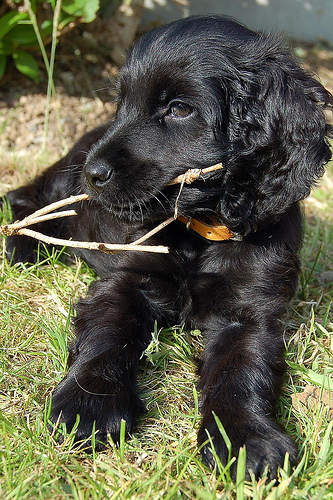

In [11]:
#test
img = open_image((path/'images').ls()[0])
tfm = tfms[0][0]
img

In [12]:
# def get_test_img():
#   return open_image((path/'images').ls()[0])
get_test_img = lambda : open_image((path/'images').ls()[0])


torch.Size([3, 500, 333])


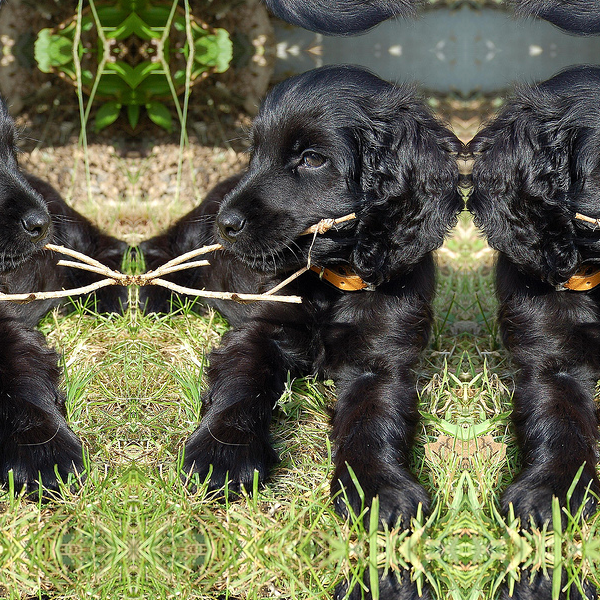

In [12]:
#test
img = get_test_img()
print(img.shape)
tfm(img, size = 600)


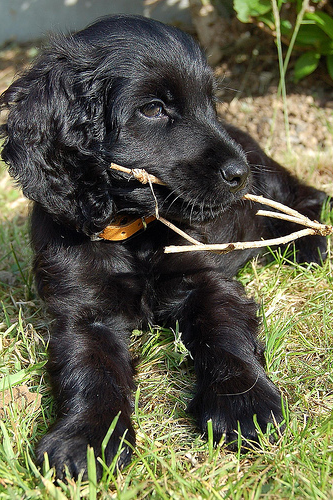

In [13]:
#test
img = get_test_img()
# tfm = tfms[0][1]
tfm = RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)
tfm(img)

In [14]:
#test
img = get_test_img()
tfm = tfms[0][2]
tfm.p = 1.0
# tfm(img)
tfm.magnitude = (-1.0, 1.0)
tfm

RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd4aada6358>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4aabc6f60>)

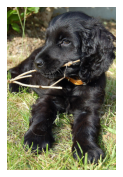

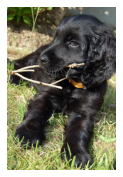

In [15]:
#test
img = get_test_img()
tfm = tfms[0][3]
tfm.p = 1.0
tfm
show_image(img), show_image(tfm(img, -10.0))

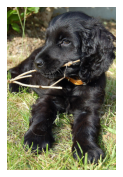

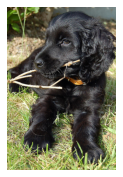

In [16]:
#test
img = get_test_img()
tfm = tfms[0][4]  
tfm.p = 1.3
tfm
show_image(img)
tfm(img)
show_image(img)

In [12]:
tfms = get_transforms()
def get_data(size, src, bs):
  return src.transform(tfms, size = size).databunch(bs = bs).normalize(imagenet_stats)

In [13]:
data = get_data(224, src, 64)

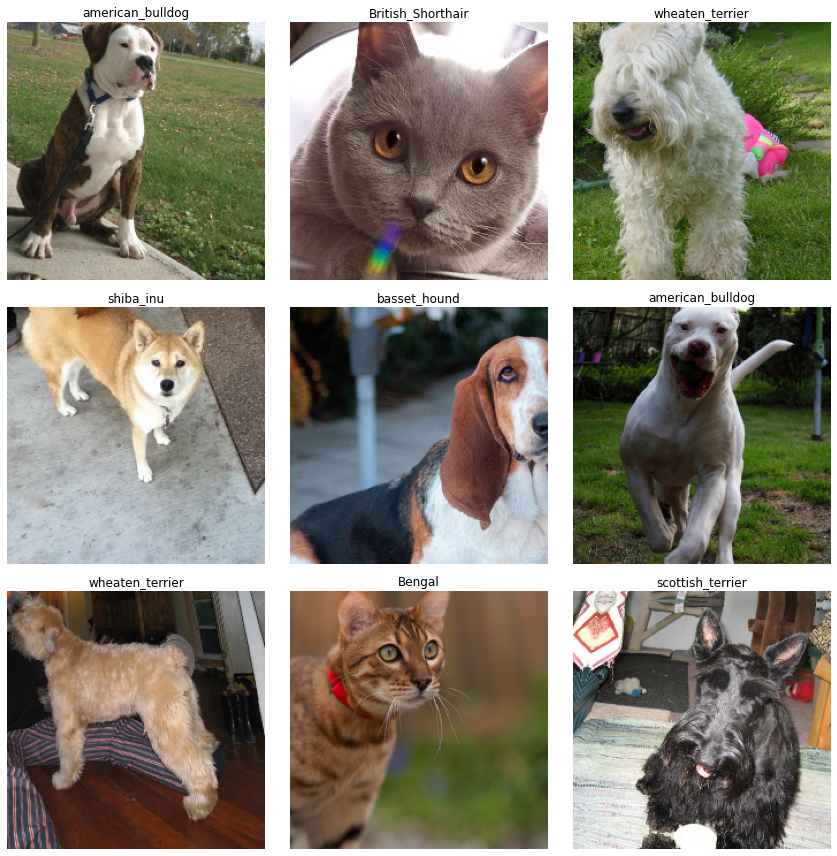

In [14]:
data.show_batch(rows = 3)

In [15]:
learn = cnn_learner(data, models.resnet34, ps = 0.4, wd = 1e-01)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [16]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


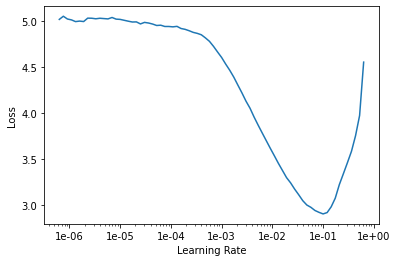

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(2, max_lr = slice(1e-02))

In [19]:
learn.save('1-224')

In [20]:
learn.load('1-224')
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-06, 1e-03))

In [21]:
learn.save('2-224')
ndata = get_data(352, src, 32)
learn.data = ndata

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


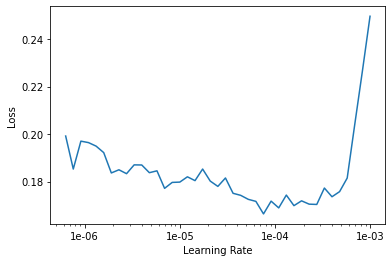

In [24]:
learn.recorder.plot()

In [25]:
learn.load('2-224')
learn.unfreeze()
learn.fit_one_cycle(3, max_lr = slice(2e-06, 2e-04))

In [26]:
learn.save('1-352')

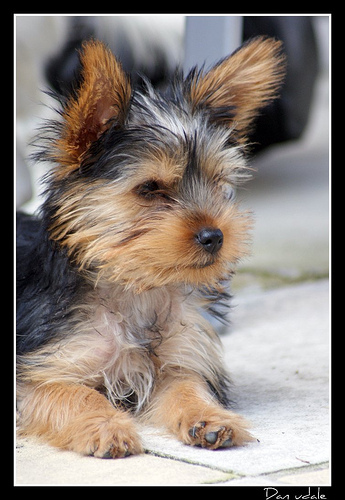

In [30]:
#convolutions....
img = data.valid_ds.x[1]
# print(data.valid_ds)
img


In [31]:
img.data.shape
b = img.data[None]
b.shape

torch.Size([1, 3, 500, 345])

In [32]:
k = [[0, -1, 0],
     [0, 2, 0],
     [0, -1, 0]]
k2 = [[0,0,0],
      [-1, 2, -1],
      [0, 0, 0]]
kernel = torch.Tensor(k).expand(1, 3, 3, 3)/6
kernel_2 = torch.Tensor(k2).expand(1, 3, 3, 3)/6
ker = torch.cat([kernel, kernel_2], dim = 0)
ker.shape

torch.Size([2, 3, 3, 3])

In [33]:
ker, ker.shape

(tensor([[[[ 0.0000, -0.1667,  0.0000],
           [ 0.0000,  0.3333,  0.0000],
           [ 0.0000, -0.1667,  0.0000]],
 
          [[ 0.0000, -0.1667,  0.0000],
           [ 0.0000,  0.3333,  0.0000],
           [ 0.0000, -0.1667,  0.0000]],
 
          [[ 0.0000, -0.1667,  0.0000],
           [ 0.0000,  0.3333,  0.0000],
           [ 0.0000, -0.1667,  0.0000]]],
 
 
         [[[ 0.0000,  0.0000,  0.0000],
           [-0.1667,  0.3333, -0.1667],
           [ 0.0000,  0.0000,  0.0000]],
 
          [[ 0.0000,  0.0000,  0.0000],
           [-0.1667,  0.3333, -0.1667],
           [ 0.0000,  0.0000,  0.0000]],
 
          [[ 0.0000,  0.0000,  0.0000],
           [-0.1667,  0.3333, -0.1667],
           [ 0.0000,  0.0000,  0.0000]]]]), torch.Size([2, 3, 3, 3]))

In [38]:
ker.sum()

tensor(1.4901e-08)

In [36]:
res = F.conv2d(b, ker, padding = (1, 1))
res, res.shape

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
 
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]]), torch.Size([1, 2, 500, 345]))

In [39]:
res.shape, img.shape

(torch.Size([1, 2, 500, 345]), torch.Size([3, 500, 345]))

In [42]:
res_1, res_2 = res[0]
x = (res_1 + res_2)/2
x, x.shape
# show_image(x)

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]), torch.Size([500, 345]))

In [ ]:
"""
2 is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r'...
"""

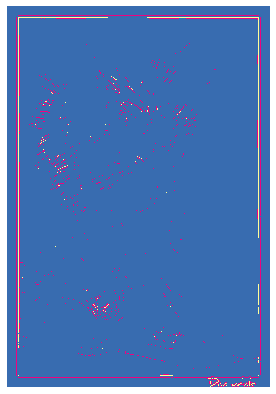

In [43]:
# x[None].shape
show_image(x[None], figsize=(7, 7), cmap ='Accent_r')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe1f8f46dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe1f760b6d8>)

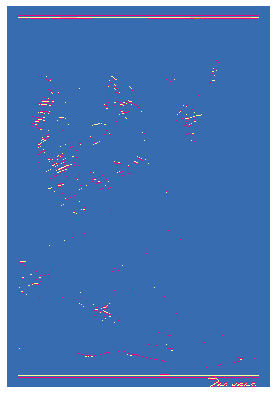

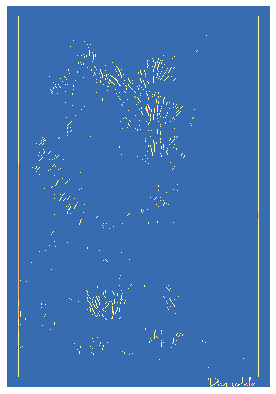

In [44]:
show_image(res_1[None], figsize=(7, 7), cmap ='Accent_r'), show_image(res_2[None], figsize=(7, 7), cmap ='Accent_r')

In [45]:
b = img.data[None]
b.shape

torch.Size([1, 3, 500, 345])

In [46]:
m = learn.model.eval()
m

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [47]:
acts = m[0](b.cuda())
acts.shape

torch.Size([1, 512, 16, 11])

In [48]:
img.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [85]:
b.shape
nb = data.one_item(data.train_ds.x[0])
nacts = m[0](nb[0])
nacts.shape

torch.Size([1, 512, 7, 7])

In [49]:
data = get_data(352, src, 32)
nb = data.one_item(data.train_ds.x[0], denorm = True)
nacts = m[0](nb[0].cuda())
nacts.shape

torch.Size([1, 512, 11, 11])

In [50]:
heat = nacts[0].mean(dim = 0)
heat.shape

torch.Size([11, 11])

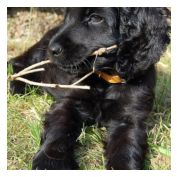

In [51]:
nb[0][0].shape
show_image(nb[0][0])

In [52]:
heat

tensor([[0.6052, 0.5082, 0.7487, 1.2093, 1.6728, 1.6819, 1.4850, 1.1517, 0.8554,
         0.7575, 0.5868],
        [0.5321, 0.6568, 1.1036, 1.7359, 2.2488, 2.2054, 1.9268, 1.6067, 1.1838,
         1.0780, 0.7519],
        [0.4512, 0.6819, 1.2549, 1.8829, 2.1662, 2.0020, 1.7602, 1.4749, 1.1484,
         1.0793, 0.7682],
        [0.4455, 0.8017, 1.2977, 1.7296, 1.7920, 1.6087, 1.4323, 1.3038, 1.1237,
         1.1264, 0.8054],
        [0.4380, 0.7029, 1.0665, 1.3147, 1.2477, 1.0710, 1.1823, 1.1264, 1.0145,
         1.0746, 0.7502],
        [0.3982, 0.5735, 0.8683, 1.0865, 1.0053, 0.9059, 1.0072, 1.1915, 1.0169,
         1.0032, 0.6758],
        [0.3136, 0.5037, 0.8490, 1.1278, 1.0516, 0.9003, 1.0074, 1.1494, 1.1156,
         1.0224, 0.6170],
        [0.2988, 0.5571, 0.9865, 1.3436, 1.1472, 0.9789, 1.0292, 1.2443, 1.1966,
         1.0217, 0.5514],
        [0.3524, 0.6357, 1.0811, 1.4061, 1.1565, 0.9560, 1.0991, 1.4115, 1.3938,
         1.0302, 0.5346],
        [0.4506, 0.7764, 1.2106, 1.42

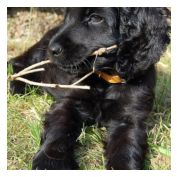

In [53]:
xim = Image(nb[0][0])
xim.show()

In [54]:
data.tfms

[functools.partial(<function _normalize_batch at 0x7fe1fa9c28c8>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)]

In [56]:
# heat.cpu().shape
heat.detach().cpu()

tensor([[0.6052, 0.5082, 0.7487, 1.2093, 1.6728, 1.6819, 1.4850, 1.1517, 0.8554,
         0.7575, 0.5868],
        [0.5321, 0.6568, 1.1036, 1.7359, 2.2488, 2.2054, 1.9268, 1.6067, 1.1838,
         1.0780, 0.7519],
        [0.4512, 0.6819, 1.2549, 1.8829, 2.1662, 2.0020, 1.7602, 1.4749, 1.1484,
         1.0793, 0.7682],
        [0.4455, 0.8017, 1.2977, 1.7296, 1.7920, 1.6087, 1.4323, 1.3038, 1.1237,
         1.1264, 0.8054],
        [0.4380, 0.7029, 1.0665, 1.3147, 1.2477, 1.0710, 1.1823, 1.1264, 1.0145,
         1.0746, 0.7502],
        [0.3982, 0.5735, 0.8683, 1.0865, 1.0053, 0.9059, 1.0072, 1.1915, 1.0169,
         1.0032, 0.6758],
        [0.3136, 0.5037, 0.8490, 1.1278, 1.0516, 0.9003, 1.0074, 1.1494, 1.1156,
         1.0224, 0.6170],
        [0.2988, 0.5571, 0.9865, 1.3436, 1.1472, 0.9789, 1.0292, 1.2443, 1.1966,
         1.0217, 0.5514],
        [0.3524, 0.6357, 1.0811, 1.4061, 1.1565, 0.9560, 1.0991, 1.4115, 1.3938,
         1.0302, 0.5346],
        [0.4506, 0.7764, 1.2106, 1.42

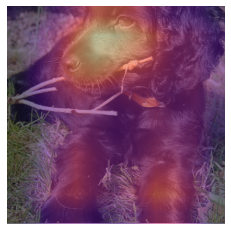

In [57]:
def show_heatmap(heat):

  _, ax = plt.subplots()
  Image(nb[0][0]).show(ax)
  ax.imshow(heat, alpha = 0.6, extent = (0, 352, 352, 0), interpolation = 'bilinear', cmap = 'magma')
show_heatmap(heat.detach().cpu())

In [58]:
from fastai.callbacks.hooks import *

In [59]:
def get_outputs(batch):
  with hook_output(m[0], detach= True) as hook_a:
    preds = m(batch)
  return hook_a

In [60]:
nb[0].cuda()

tensor([[[[0.1691, 0.1744, 0.1658,  ..., 0.7054, 0.7272, 0.7346],
          [0.1699, 0.1575, 0.1349,  ..., 0.6818, 0.7058, 0.7131],
          [0.1254, 0.0921, 0.1111,  ..., 0.6877, 0.6983, 0.7020],
          ...,
          [0.5151, 0.4122, 0.8213,  ..., 0.6486, 0.4092, 0.7527],
          [0.4963, 0.4707, 0.6575,  ..., 0.4768, 0.7509, 0.7738],
          [0.5431, 0.5067, 0.4259,  ..., 0.5356, 0.8951, 0.7405]],

         [[0.1316, 0.1378, 0.1365,  ..., 0.6077, 0.6360, 0.6484],
          [0.1159, 0.1109, 0.0996,  ..., 0.5802, 0.6051, 0.6266],
          [0.0862, 0.0603, 0.0973,  ..., 0.5935, 0.6044, 0.6118],
          ...,
          [0.6459, 0.5318, 0.8349,  ..., 0.6081, 0.3409, 0.6721],
          [0.6053, 0.5257, 0.6910,  ..., 0.3568, 0.6199, 0.6741],
          [0.6327, 0.5925, 0.4929,  ..., 0.4392, 0.8319, 0.7268]],

         [[0.0745, 0.0803, 0.0685,  ..., 0.4518, 0.4772, 0.4945],
          [0.0725, 0.0638, 0.0420,  ..., 0.4358, 0.4594, 0.4658],
          [0.0392, 0.0095, 0.0393,  ..., 0

In [61]:
hook_op = get_outputs(nb[0].cuda())

In [62]:
acts = hook_op.stored[0]
avg_acts = acts.mean(0)

In [63]:
avg_acts, avg_acts.shape

(tensor([[0.6052, 0.5082, 0.7487, 1.2093, 1.6728, 1.6819, 1.4850, 1.1517, 0.8554,
          0.7575, 0.5868],
         [0.5321, 0.6568, 1.1036, 1.7359, 2.2488, 2.2054, 1.9268, 1.6067, 1.1838,
          1.0780, 0.7519],
         [0.4512, 0.6819, 1.2549, 1.8829, 2.1662, 2.0020, 1.7602, 1.4749, 1.1484,
          1.0793, 0.7682],
         [0.4455, 0.8017, 1.2977, 1.7296, 1.7920, 1.6087, 1.4323, 1.3038, 1.1237,
          1.1264, 0.8054],
         [0.4380, 0.7029, 1.0665, 1.3147, 1.2477, 1.0710, 1.1823, 1.1264, 1.0145,
          1.0746, 0.7502],
         [0.3982, 0.5735, 0.8683, 1.0865, 1.0053, 0.9059, 1.0072, 1.1915, 1.0169,
          1.0032, 0.6758],
         [0.3136, 0.5037, 0.8490, 1.1278, 1.0516, 0.9003, 1.0074, 1.1494, 1.1156,
          1.0224, 0.6170],
         [0.2988, 0.5571, 0.9865, 1.3436, 1.1472, 0.9789, 1.0292, 1.2443, 1.1966,
          1.0217, 0.5514],
         [0.3524, 0.6357, 1.0811, 1.4061, 1.1565, 0.9560, 1.0991, 1.4115, 1.3938,
          1.0302, 0.5346],
         [0.4506, 0

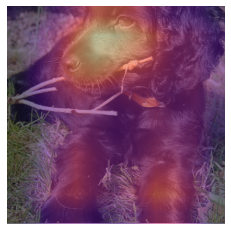

In [64]:
show_heatmap(avg_acts.cpu())